# Importando o dataset

In [1]:
import os
import pandas as pd

script_dir = './'
iris_dataset_path = os.path.join(script_dir, 'datasets', 'iris', 'data.csv')

dataset = pd.read_csv(iris_dataset_path, index_col='Id')
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
entradas = dataset.drop('Species', axis=1)
entradas = entradas.astype('float32')
entradas = entradas.values

saidas = dataset['Species'].values

# Separando dados de teste e treino

In [ ]:
especies = saidas.unique()
# Pode-se usar sklearn.model_selection.LabelEncoder()
mapa_especies = {especies[i]: i for i in range(len(especies))} 
print(mapa_especies)

saidas = saidas.map(mapa_especies)

In [29]:
from sklearn.model_selection import train_test_split

# 75% para treino e 25% para teste
x_train, x_test, y_train, y_test = train_test_split(
    entradas, saidas, test_size=0.25
)

# Criando a rede neural

In [30]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [38]:
from keras.api.models import Sequential
from keras.api.layers import Dense, Input
from keras.api.optimizers import Adam

num_entradas_modelo = x_train.shape[1]
adam_optimizer = Adam(
    learning_rate=0.0001,
    weight_decay=0,
    clipvalue=0.5
)

modelo = Sequential(
    name='Iris',
    layers=[
        Input(shape=[num_entradas_modelo,]),
        Dense(
            units=4,
            activation='relu',
            kernel_initializer='random_uniform',
            use_bias=True
        ),
        Dense(
            units=4,
            activation='relu',
            kernel_initializer='random_uniform',
            use_bias=True
        ),
        Dense(
            units=3,
            activation='softmax',
            kernel_initializer='random_uniform',
            use_bias=True
        )
    ]
)
modelo.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)
modelo.summary()

Model: "Iris"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55 (220.00 B)

 Trainable params: 55 (220.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Alterando a dimensão dos dados de saida (None, 1) para se adequar ao layer de saida da rede (None, 3)
# No caso, ao invés de cada espécie ser representada por 1 ou 2 ou 3, será representada por [1, 0, 0] ou
#   [0, 1, 0] ou [0, 0, 1]
from keras.api.utils import to_categorical
from keras.api.callbacks import History

y_train_dummy = to_categorical(
    x=y_train,
    num_classes=len(mapa_especies.values())
)

treinamento: History = modelo.fit(
    x=x_train,
    y=y_train_dummy,
    batch_size=10,
    epochs=1000,
)

Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.3732 - loss: 1.0986  
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3710 - loss: 1.0986 
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3267 - loss: 1.0986 
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2966 - loss: 1.0986 
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3870 - loss: 1.0985 
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3258 - loss: 1.0986 
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3144 - loss: 1.0986 
Epoch 8/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3740 - loss: 1.0984 
Epoch 9/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2964 - loss: 1.0985 
Epoch 10/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4038 - loss: 1.0985 
Epoch 11

Precisão de treinamento: 89.88303600549698%
Custo de treinamento: 0.5067393665462733


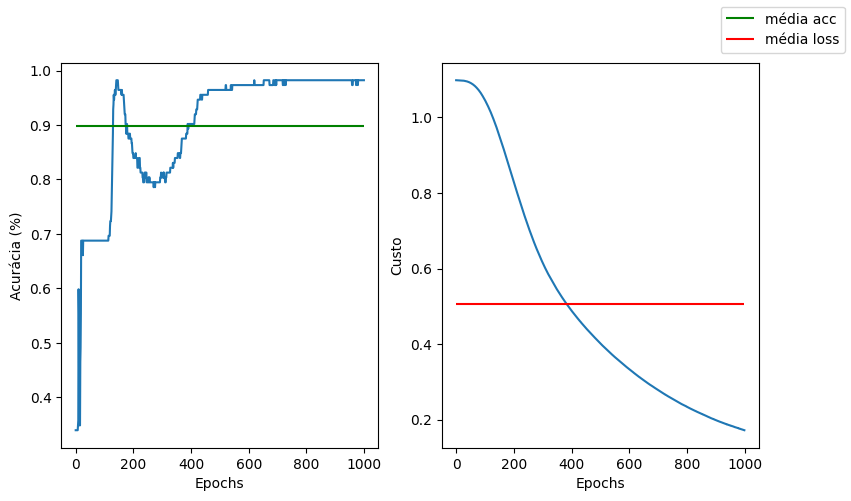

In [52]:
from numpy import mean
from matplotlib import pyplot as plt

acuracia = treinamento.history['categorical_accuracy']
custo = treinamento.history['loss']

media_acuracia = mean(acuracia)
media_custo = mean(custo)

print(f'Precisão de treinamento: {media_acuracia * 100}%')
print(f'Custo de treinamento: {media_custo}')

fig, axs = plt.subplots(figsize=(9, 5), nrows=1, ncols=2)
ax1: plt.Axes = axs[0]
ax2: plt.Axes = axs[1]

ax1.plot(treinamento.epoch, acuracia)
ax1.hlines(
    y=media_acuracia, 
    xmin=treinamento.epoch[0],
    xmax=treinamento.epoch[-1],
    colors='green',
    label='média acc'
)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Acurácia (%)')

ax2.plot(treinamento.epoch, custo)
ax2.hlines(
    y=media_custo, 
    xmin=treinamento.epoch[0],
    xmax=treinamento.epoch[-1],
    colors='red',
    label='média loss'
)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Custo')

fig.legend()
plt.show()

In [56]:
# Avaliando o desempenho do modelo
y_test_dummy = to_categorical(
    x=y_test,
    num_classes=len(mapa_especies.values())
)

resultados = modelo.evaluate(
    x=x_test,
    y=y_test_dummy
)

print(f'Acurácia dos testes: ', round(resultados[1]*100, 4), '%')
print(f'Custo dos testes: ', round(resultados[0], 4))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.9720 - loss: 0.1438 
Acurácia dos testes:  97.3684 %
Custo dos testes:  0.1453


In [75]:
# Tambem avaliando o modelo utilizando outras ferramentas
from sklearn.metrics import confusion_matrix
from numpy import argmax

previsoes = modelo.predict(x=x_test)
previsoes.round(3)

# Normalizando os valores entre 0 e 1
previsoes = (previsoes > 0.5).astype('int32')

# Obtendo o indice com o valor mais alto da previsão (1)
previsoes_norm = [argmax(previsao) for previsao in previsoes]
previsoes_norm

y_test_norm = y_test

matriz = confusion_matrix(
    y_pred=y_test_norm,
    y_true=previsoes_norm
)

print(matriz)

acertos = 0
erros = 0
for i in range(len(matriz)):
    for j in range(len(matriz[i])):
        if i == j:
            acertos += matriz[i][j]
        else:
            erros += matriz[i][j]

print("Acertos: ", acertos, f"({round(acertos/(acertos+erros), 2)}%)")
print("Erros: ", erros, f"({round(erros/(acertos+erros), 2)}%)")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[12  0  0]
 [ 0 10  0]
 [ 0  1 15]]
Acertos:  37 (0.97%)
Erros:  1 (0.03%)


# Otimização do modelo

In [59]:
import numpy as np

from keras.api.models import Sequential, model_from_json
from keras.api.layers import Dense, Dropout, Input
from keras.api.utils import to_categorical
from keras.api.optimizers import Adam, AdamW

from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [37]:
classes = np.unique(saidas)

# Atualiza as saidas para valores numéricos
label_encoder = LabelEncoder()
saidas_numeric = label_encoder.fit_transform(saidas)

# Atualiza as saidas para hot-encoded
saidas_dummy = to_categorical(
    x=saidas_numeric,
    num_classes=len(classes)
)

## Validação cruzada

In [19]:
def criar_modelo(nome = "Iris", num_entradas_modelo = 4):
    modelo = Sequential(
        name=nome,
        layers=[
            Input(shape=[num_entradas_modelo,]),
            Dense(
                units=4,
                activation='relu',
                kernel_initializer='random_uniform',
                use_bias=True
            ),
            Dense(
                units=4,
                activation='relu',
                kernel_initializer='random_uniform',
                use_bias=True
            ),
            Dense(
                units=3,
                activation='softmax',
                kernel_initializer='random_uniform',
                use_bias=True
            )
        ]
    )

    modelo.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['categorical_accuracy']
    )

    return modelo

In [ ]:
classificador = KerasClassifier(
    model=criar_modelo,
    epochs=1000,
    batch_size=10,
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
    optimizer='adam'
)

K = 10 # Número de grupos/repetições que serão feitas no dataset
resultados = cross_val_score(
    estimator=classificador,
    X=entradas,
    y=saidas_dummy,
    cv=K
)

In [108]:
media_resultados = np.mean(resultados)
desvio_resultados = np.std(resultados)

print(f'Acurácia média: {round(media_resultados*100, 4)}%')
print(f'Acurácia desvio pad.: {round(desvio_resultados*100, 4)}%')

Acurácia média: 86.6667%
Acurácia desvio pad.: 29.3636%


## Tunning

In [38]:
def criar_modelo(activation, neurons, kernel_initializer, otimizador, custo,
                 metrica, nome = "Iris", num_entradas_modelo = 4, dropout = []) -> Sequential:
    modelo = Sequential(
        name=nome,
        layers=[
            Input(shape=[num_entradas_modelo,]),
        ]
    )

    for i in range(len(neurons)):
        neuron = neurons[i]
        modelo.add(
            Dense(
                units=neuron,
                activation=activation,
                kernel_initializer=kernel_initializer,
            )
        )

        if i < len(dropout):
            modelo.add(Dropout(dropout[i]))

    modelo.add(
        Dense(
            units=3,
            activation='softmax',
        )
    )

    modelo.compile(
        optimizer = otimizador,
        loss = custo,
        metrics = metrica
    )

    return modelo

In [42]:
classificador = KerasClassifier(
    model=criar_modelo,
    verbose=2
)

adam = Adam(name='adam_medium', learning_rate=0.001, weight_decay=0, clipvalue=0.5)
adamw = AdamW(name='adam_w')

parametros_classificador = {
    "epochs": [500],
    "batch_size": [10],
    "model__otimizador": [adam],
    "model__custo": ['categorical_crossentropy'],
    "model__metrica": [['categorical_accuracy']],
    "model__activation": ['relu'],
    "model__kernel_initializer": ['random_uniform'],
    "model__dropout": [[]],
    "model__neurons": [[8]],
    "model__num_entradas_modelo": [entradas.shape[1]]
}

K = 5
otimizador = GridSearchCV(
    estimator= classificador,
    param_grid= parametros_classificador,
    scoring='accuracy',
    cv= K,
    n_jobs=2,
    verbose=1
)

In [43]:
import time

tempo_inicio = time.time()

otimizador.fit(
    X= entradas,
    y= saidas_dummy
)

tempo_final = time.time()

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Epoch 1/500
15/15 - 1s - 46ms/step - categorical_accuracy: 0.6600 - loss: 1.0700
Epoch 2/500
15/15 - 0s - 3ms/step - categorical_accuracy: 0.6600 - loss: 1.0428
Epoch 3/500
15/15 - 0s - 3ms/step - categorical_accuracy: 0.6667 - loss: 1.0205
Epoch 4/500
15/15 - 0s - 3ms/step - categorical_accuracy: 0.6667 - loss: 0.9976
Epoch 5/500
15/15 - 0s - 3ms/step - categorical_accuracy: 0.6667 - loss: 0.9728
Epoch 6/500
15/15 - 0s - 3ms/step - categorical_accuracy: 0.6667 - loss: 0.9480
Epoch 7/500
15/15 - 0s - 3ms/step - categorical_accuracy: 0.6667 - loss: 0.9217
Epoch 8/500
15/15 - 0s - 3ms/step - categorical_accuracy: 0.6667 - loss: 0.8939
Epoch 9/500
15/15 - 0s - 3ms/step - categorical_accuracy: 0.6667 - loss: 0.8665
Epoch 10/500
15/15 - 0s - 3ms/step - categorical_accuracy: 0.6800 - loss: 0.8374
Epoch 11/500
15/15 - 0s - 3ms/step - categorical_accuracy: 0.6867 - loss: 0.8092
Epoch 12/500
15/15 - 0s - 3ms/step - categorical_accuracy

In [44]:
tempo_execucao = tempo_final - tempo_inicio


melhores_parametros = otimizador.best_params_
melhor_precisao = otimizador.best_score_

print("\nMelhor precisão: ", melhor_precisao)
print(f"Melhores parametros: {melhores_parametros}")
print(f"Tempo execusão: {round(tempo_execucao, 2)} s")


Melhor precisão:  0.9266666666666667
Melhores parametros: {'batch_size': 10, 'epochs': 500, 'model__activation': 'relu', 'model__custo': 'categorical_crossentropy', 'model__dropout': [], 'model__kernel_initializer': 'random_uniform', 'model__metrica': ['categorical_accuracy'], 'model__neurons': [8], 'model__num_entradas_modelo': 4, 'model__otimizador': <keras.src.optimizers.adam.Adam object at 0x000001FC675F2ED0>}
Tempo execusão: 174.79 s


## Salvar modelo e carrega-lo para testar em uma amostra

In [57]:
modelo = otimizador.best_estimator_.model_

modelo_json = modelo.to_json()

script_dir = './'
modelo_json_path = os.path.join(script_dir, 'models', 'iris', 'iris.model.json')
modelo_weigths_path = os.path.join(script_dir, 'models', 'iris', 'iris.weights.h5')

with open(modelo_json_path, 'w') as json:
    json.write(modelo_json)

modelo.save_weights(modelo_weigths_path)

In [85]:
with open(modelo_json_path, 'r') as json:
    modelo_carregado: Sequential = model_from_json(json.read())

modelo_carregado.load_weights(modelo_weigths_path)

dado_teste = np.array([[4.85, 3, 1.76, 0.44]])

resultado = modelo_carregado.predict(dado_teste)

print(resultado.round(1))

# Converter resultado p/ classe de iris correspondente
for index in range(len(resultado[0])):
    porcentagem = int(np.round(resultado[0][index], 1))

    if porcentagem == 1:
        print("Classe da amostra: ", classes[index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[1. 0. 0.]]
Classe da amostra:  Iris-setosa
